In [1]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn import datasets
import copy
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
digits = datasets.load_digits()  # 手写数字数据集
X = digits.data
y = copy.deepcopy(digits.target)
y[digits.target == 9] = 1
y[digits.target != 9] = 0  # 使数据类别不平衡(使其变为二分类问题)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
log_reg = LogisticRegression(solver='sag', max_iter=10000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [3]:
decision_scores = log_reg.decision_function(X_test)  # 计算样本到分离超平面的有符号距离
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
auc = roc_auc_score(y_true=y_test,
                    # In the binary and multilabel cases, these can be either probability estimates or non-thresholded decision values (as returned by decision_function on some classifiers).
                    y_score=decision_scores)  # 计算AUC(二分类)
auc

0.9829903978052126

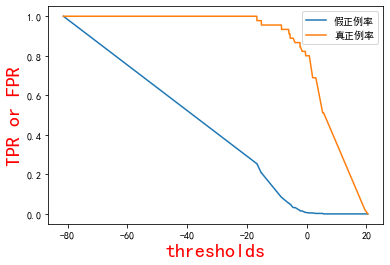

In [4]:
plt.plot(thresholds, fprs, label='假正例率')
plt.plot(thresholds, tprs, label='真正例率')
plt.xlabel('thresholds', color='red', size=20)
plt.ylabel('TPR or FPR', color='red', size=20)
plt.legend()
plt.show()

In [7]:
fprs

array([0.        , 0.        , 0.        , 0.00246914, 0.00246914,
       0.00493827, 0.00493827, 0.00740741, 0.00740741, 0.01481481,
       0.01481481, 0.01728395, 0.01728395, 0.03209877, 0.03209877,
       0.04938272, 0.04938272, 0.05432099, 0.05432099, 0.08395062,
       0.08395062, 0.20740741, 0.20740741, 0.25432099, 0.25432099,
       1.        ])

In [8]:
tprs

array([0.        , 0.02222222, 0.51111111, 0.51111111, 0.68888889,
       0.68888889, 0.8       , 0.8       , 0.82222222, 0.82222222,
       0.84444444, 0.84444444, 0.86666667, 0.86666667, 0.88888889,
       0.88888889, 0.91111111, 0.91111111, 0.93333333, 0.93333333,
       0.95555556, 0.95555556, 0.97777778, 0.97777778, 1.        ,
       1.        ])

In [ ]:
# 手工绘制ROC曲线
plt.plot(fprs, tprs, label='ROC曲线,AUC={}'.format(str(auc)))  # 绘制ROC曲线(仅二分类)
plt.legend()
plt.xlabel('假正例率', color='red', size=20)
plt.ylabel('真正例率', color='red', size=20)
plt.show()

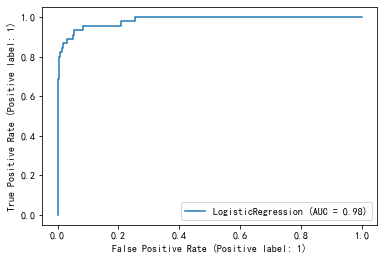

In [6]:
# sklearn包绘制
plot_roc_curve(log_reg, X_test, y_test)